<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [1]:
# Step 1: Download the dataset
# !wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



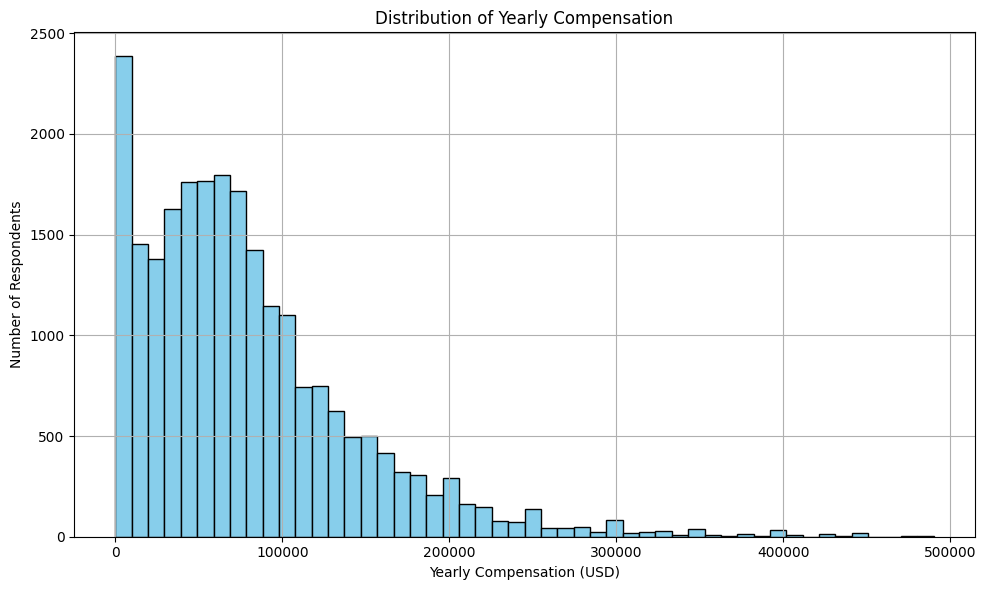

In [4]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing or invalid compensation values
df_clean = df.dropna(subset=['ConvertedCompYearly'])

# Optionally filter out extreme outliers for a clearer plot (e.g., over $500,000)
df_filtered = df_clean[df_clean['ConvertedCompYearly'] < 500000]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')

plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



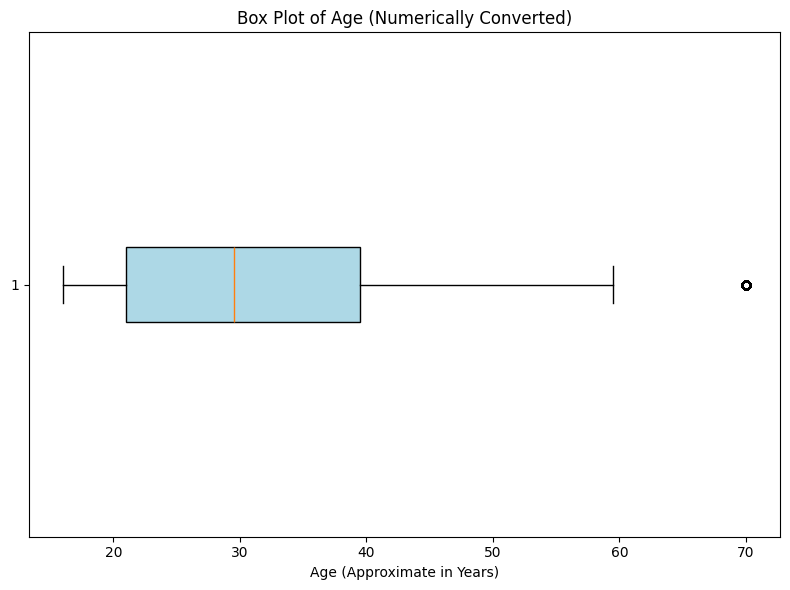

In [5]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values
df_clean = df.dropna(subset=['Age'])

# Map categorical age ranges to approximate numeric midpoints
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Apply mapping
df_clean['AgeNumeric'] = df_clean['Age'].map(age_mapping)

# Drop any rows that still have missing age after mapping
df_clean = df_clean.dropna(subset=['AgeNumeric'])

# Create box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_clean['AgeNumeric'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.title('Box Plot of Age (Numerically Converted)')
plt.xlabel('Age (Approximate in Years)')
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



/tmp/ipykernel_3720/3943743685.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age_numeric'] = df_clean['Age'].map(age_mapping)


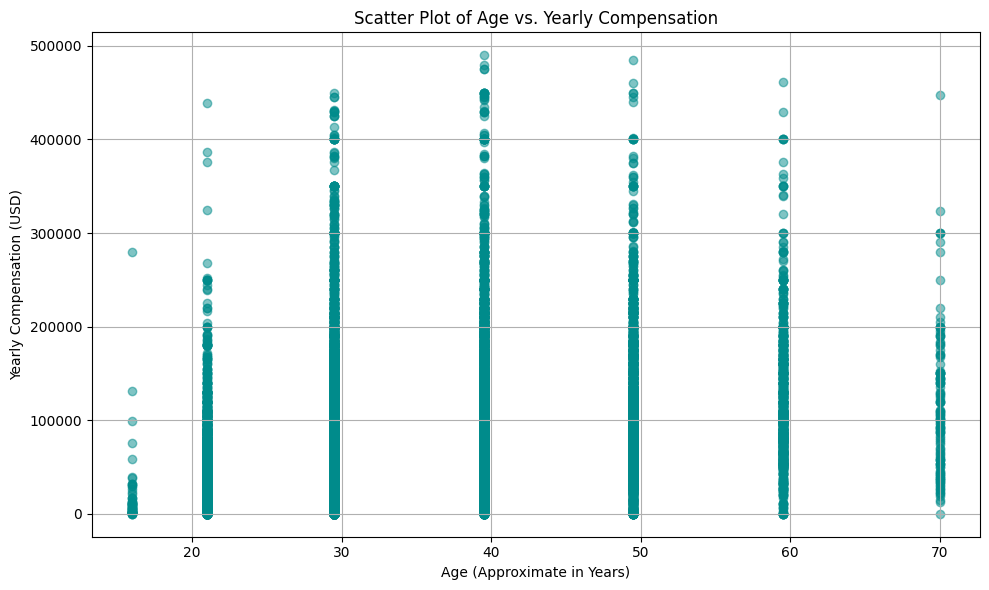

In [6]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values in relevant columns
df_clean = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Map age categories to approximate numeric values
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Convert to numeric
df_clean['Age_numeric'] = df_clean['Age'].map(age_mapping)
df_clean = df_clean.dropna(subset=['Age_numeric'])

# Optional: filter out extreme compensation values for clarity
df_filtered = df_clean[df_clean['ConvertedCompYearly'] < 500000]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Age_numeric'], df_filtered['ConvertedCompYearly'], alpha=0.5, color='darkcyan')

plt.title('Scatter Plot of Age vs. Yearly Compensation')
plt.xlabel('Age (Approximate in Years)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


/tmp/ipykernel_3720/3215607645.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age_numeric'] = df_clean['Age'].map(age_mapping)


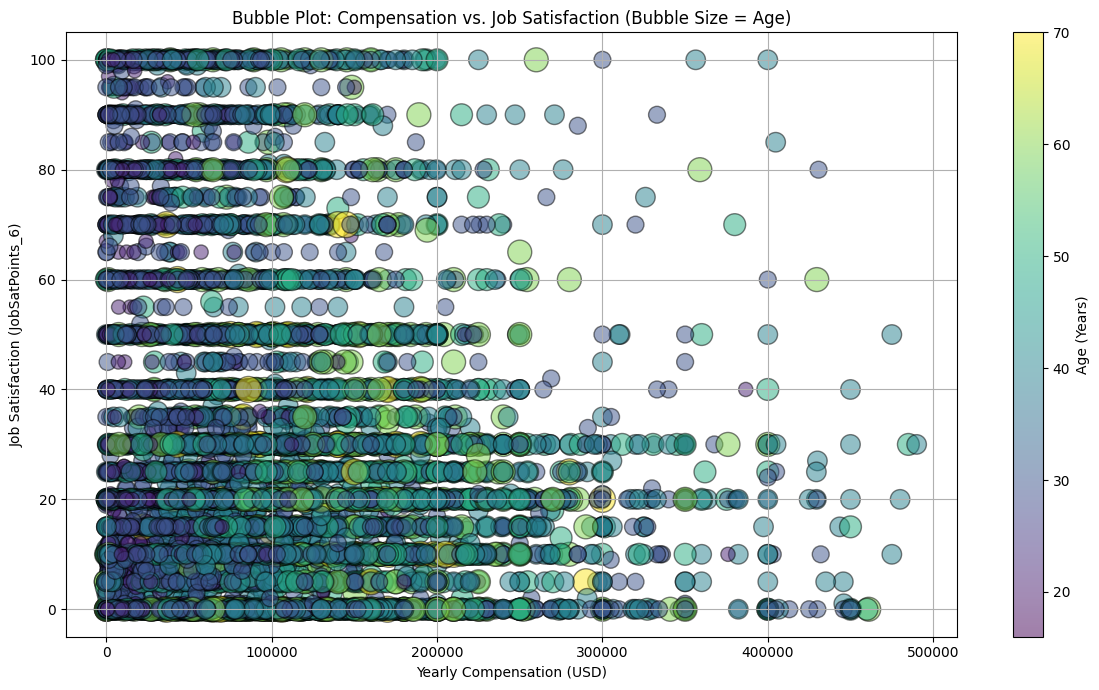

In [7]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in all relevant columns
df_clean = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Map Age to numeric values
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df_clean['Age_numeric'] = df_clean['Age'].map(age_mapping)
df_clean = df_clean.dropna(subset=['Age_numeric'])

# Optional: filter out extreme compensation values for clarity
df_filtered = df_clean[df_clean['ConvertedCompYearly'] < 500000]

# Normalize bubble size for visibility (optional)
bubble_size = df_filtered['Age_numeric'] * 5  # scale for visibility

# Plot bubble chart
plt.figure(figsize=(12, 7))
plt.scatter(
    df_filtered['ConvertedCompYearly'],
    df_filtered['JobSatPoints_6'],
    s=bubble_size,
    alpha=0.5,
    c=df_filtered['Age_numeric'],  # Optional: color by age
    cmap='viridis',
    edgecolors='black'
)

plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.colorbar(label='Age (Years)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



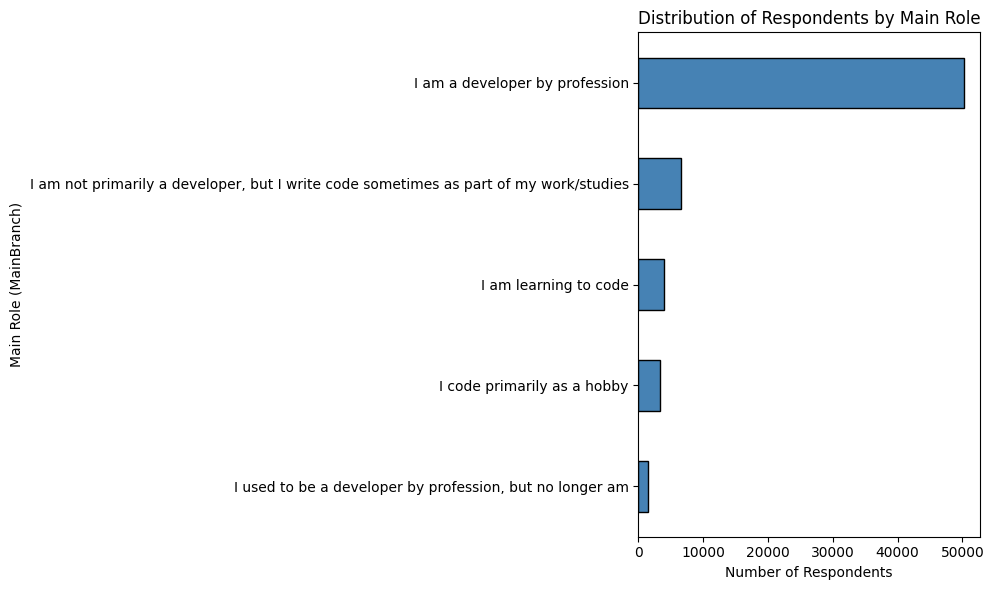

In [8]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values in MainBranch
df_clean = df.dropna(subset=['MainBranch'])

# Count occurrences of each role
role_counts = df_clean['MainBranch'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
role_counts.plot(kind='barh', color='steelblue', edgecolor='black')

plt.title('Distribution of Respondents by Main Role')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Role (MainBranch)')
plt.tight_layout()
plt.gca().invert_yaxis()  # Puts the most common role at the top
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



/tmp/ipykernel_3720/2045072894.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LanguageWantToWorkWith'] = df_clean['LanguageWantToWorkWith'].str.split(';')


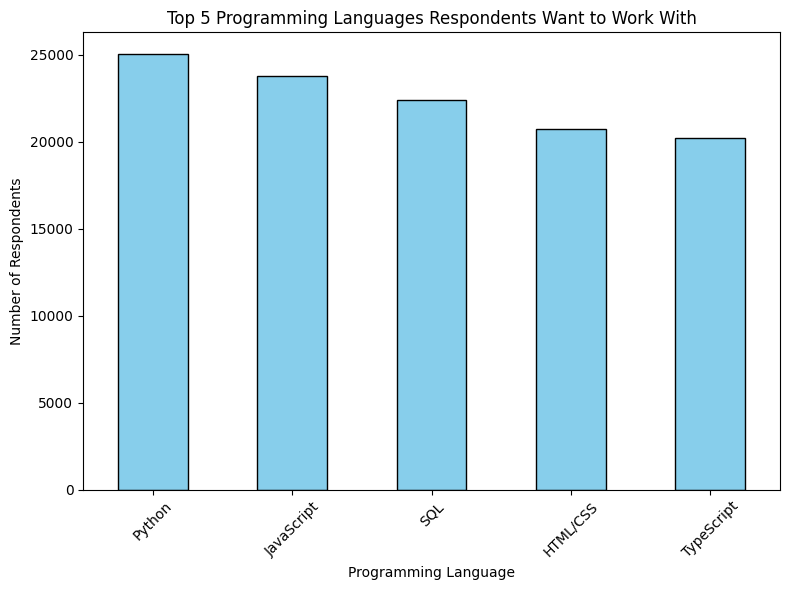

In [9]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values
df_clean = df.dropna(subset=['LanguageWantToWorkWith'])

# Split the languages into lists (adjust delimiter if needed, e.g., ';' or ',')
df_clean['LanguageWantToWorkWith'] = df_clean['LanguageWantToWorkWith'].str.split(';')

# Explode the list into separate rows
df_exploded = df_clean.explode('LanguageWantToWorkWith')

# Strip whitespace
df_exploded['LanguageWantToWorkWith'] = df_exploded['LanguageWantToWorkWith'].str.strip()

# Count frequency of each language
language_counts = df_exploded['LanguageWantToWorkWith'].value_counts()

# Select top 5
top5_languages = language_counts.head(5)

# Plot vertical bar chart
plt.figure(figsize=(8, 6))
top5_languages.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


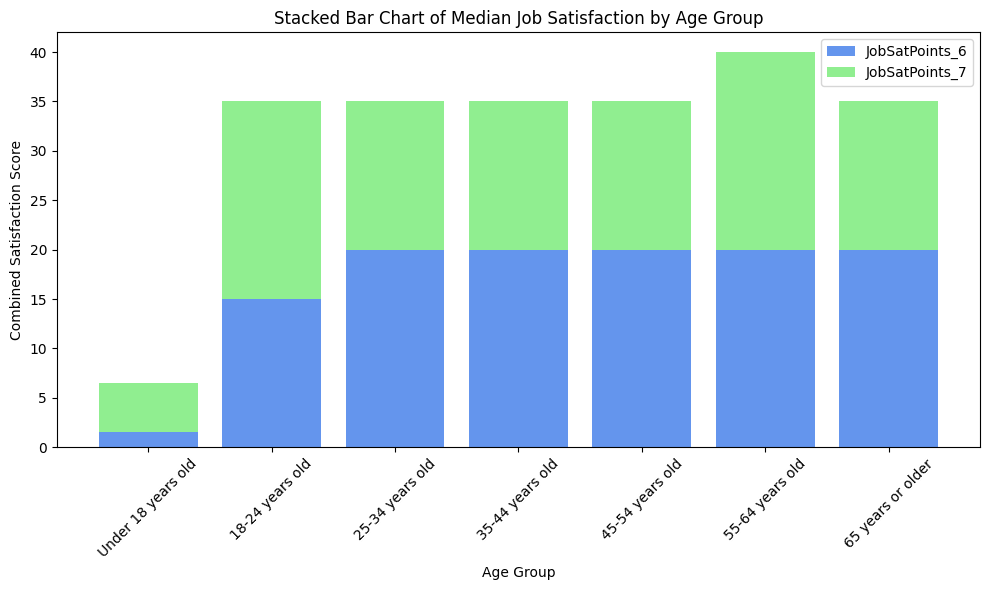

In [10]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values in relevant columns
df_clean = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by Age and calculate median for both satisfaction scores
median_satisfaction = df_clean.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Reorder age groups (adjust as needed to match your dataset)
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
# Filter only available age groups
age_order = [age for age in age_order if age in median_satisfaction.index]

# Reindex and drop any missing
median_satisfaction = median_satisfaction.reindex(age_order).dropna()

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_satisfaction.index, median_satisfaction['JobSatPoints_6'], label='JobSatPoints_6', color='cornflowerblue')
plt.bar(median_satisfaction.index, median_satisfaction['JobSatPoints_7'], bottom=median_satisfaction['JobSatPoints_6'], label='JobSatPoints_7', color='lightgreen')

plt.title('Stacked Bar Chart of Median Job Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Combined Satisfaction Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



/tmp/ipykernel_3720/2290113170.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DatabaseHaveWorkedWith'] = df_clean['DatabaseHaveWorkedWith'].str.split(';')


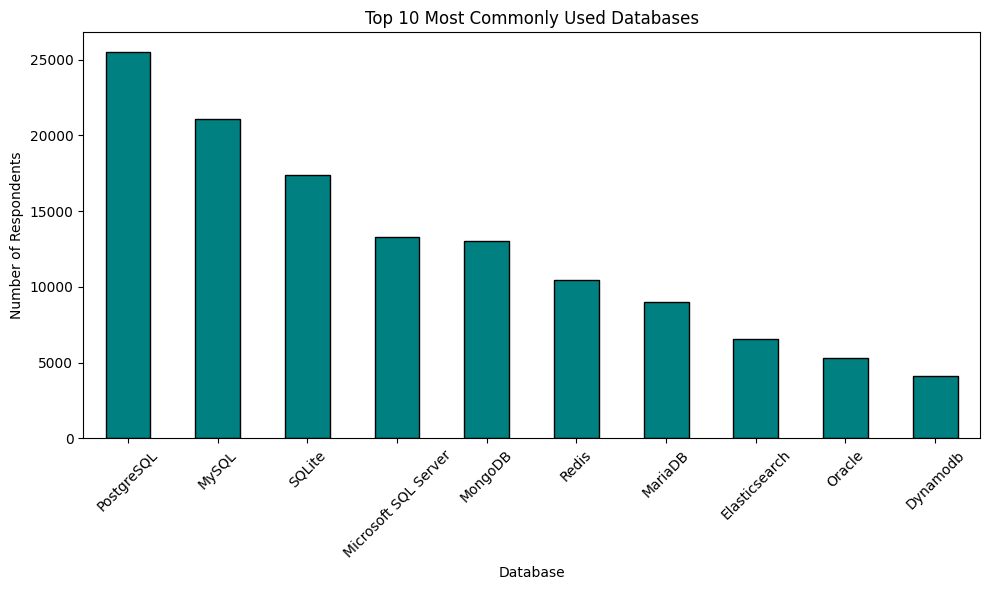

In [11]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values
df_clean = df.dropna(subset=['DatabaseHaveWorkedWith'])

# Split the string lists into actual lists (adjust delimiter if needed)
df_clean['DatabaseHaveWorkedWith'] = df_clean['DatabaseHaveWorkedWith'].str.split(';')

# Explode to one database per row
df_exploded = df_clean.explode('DatabaseHaveWorkedWith')

# Strip whitespace
df_exploded['DatabaseHaveWorkedWith'] = df_exploded['DatabaseHaveWorkedWith'].str.strip()

# Count the frequencies
db_counts = df_exploded['DatabaseHaveWorkedWith'].value_counts()

# Take top 10 most popular databases (adjust as needed)
top_dbs = db_counts.head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
top_dbs.plot(kind='bar', color='teal', edgecolor='black')

plt.title('Top 10 Most Commonly Used Databases')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_3720/957987648.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


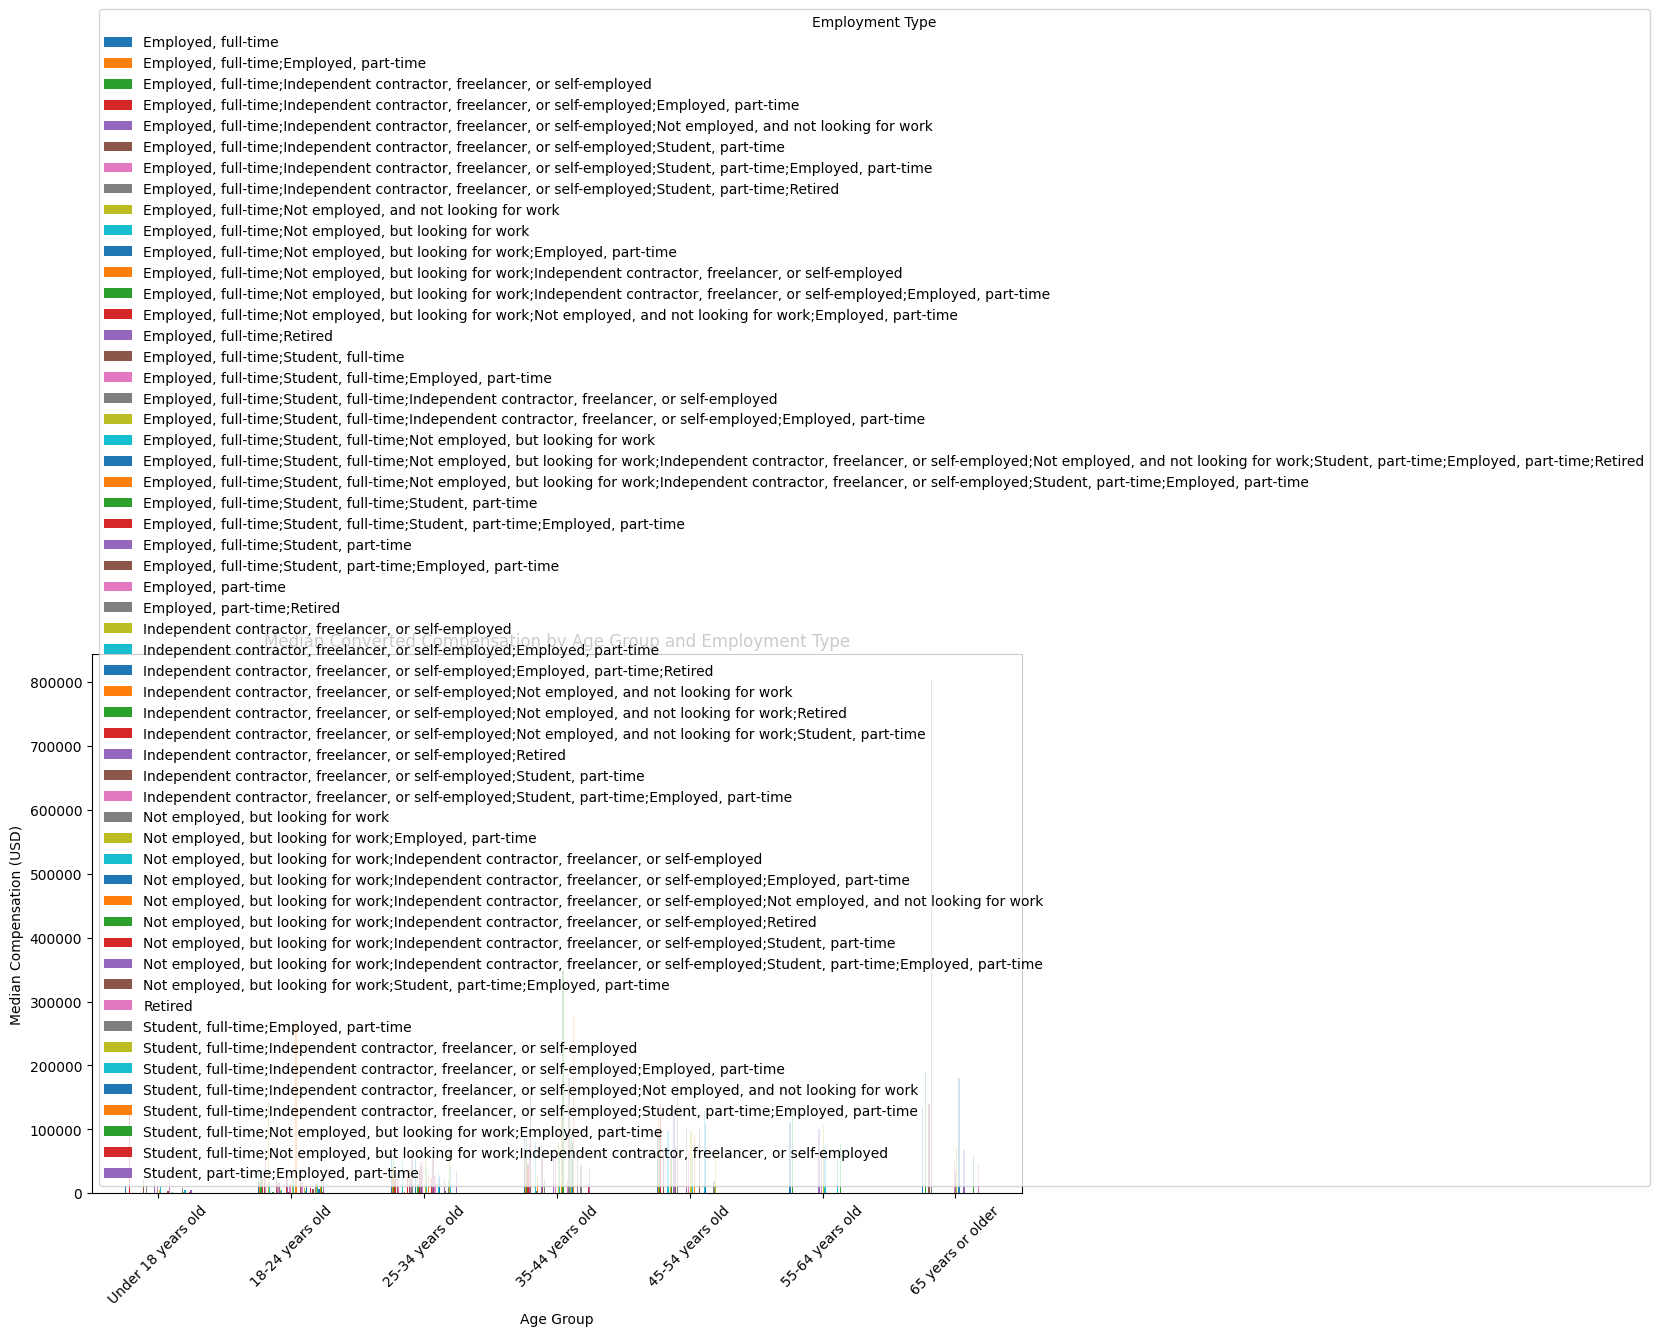

In [16]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Drop missing values for Age, Employment, and compensation
df_clean = df.dropna(subset=['Age', 'Employment', 'ConvertedCompYearly'])

# Group by Age and Employment, compute median compensation
median_comp = df_clean.groupby(['Age', 'Employment'])['ConvertedCompYearly'].median().unstack()

# Define a logical order for age groups
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Reindex rows by age_order, dropping missing ages
median_comp = median_comp.reindex(age_order).dropna(how='all')

# Plot grouped bar chart
ax = median_comp.plot(kind='bar', figsize=(12, 7))

ax.set_title('Median Converted Compensation by Age Group and Employment Type')
ax.set_xlabel('Age Group')
ax.set_ylabel('Median Compensation (USD)')
plt.xticks(rotation=45)
plt.legend(title='Employment Type')
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



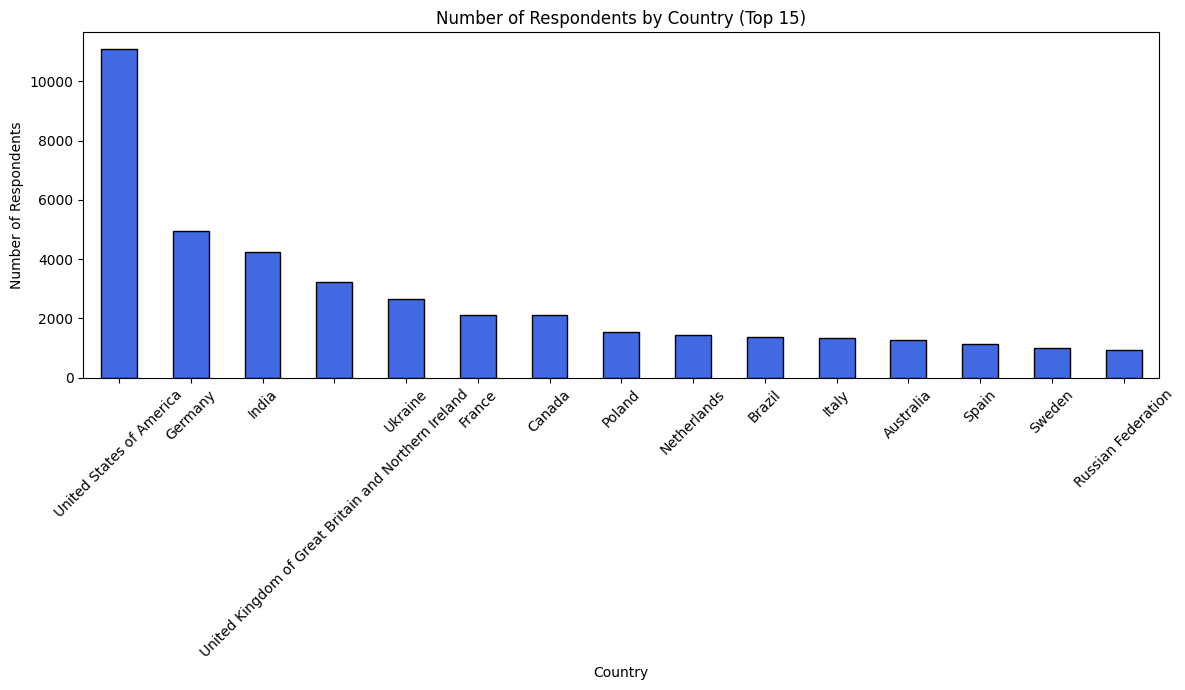

In [17]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values in 'Country'
df_clean = df.dropna(subset=['Country'])

# Count respondents per country
country_counts = df_clean['Country'].value_counts()

# Optionally, take top 15 countries for readability
top_countries = country_counts.head(15)

# Plot bar chart
plt.figure(figsize=(12, 7))
top_countries.plot(kind='bar', color='royalblue', edgecolor='black')

plt.title('Number of Respondents by Country (Top 15)')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
